In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from diffusionpy import vpure,Diffusion_MS,NETVLE,lngi
import matplotlib.pyplot as plt


In [2]:
wv0=0.00001
dl0=0.68
wi0=np.asarray([wv0,(1-wv0)*(1-dl0),(1-wv0)*dl0])
mobile=np.asarray([True,False,False])


In [3]:
alphaexp=np.array([0. , 0. , 0. , 0. , 0. ,0. , 0. , 0.06956025, 0.02404673, 0.0709951 ,0.15687626, 0.2576435 , 0.37673205, 0.51643208, 0.67216326,0.80081357, 0.80802239, 0.81517011, 0.82134036, 0.82702189,0.83215358, 0.83697982, 0.84137842, 0.84547156, 0.84925924,0.85280256, 0.85549059, 0.85958373, 0.8626994 ])
texp=np.array([6.86410000e-01, 2.07982000e+00, 3.95521000e+00, 7.50385000e+00,1.47500300e+01, 3.37533200e+01, 1.06815260e+02, 1.98581620e+02,2.89263840e+02, 3.80526380e+02, 4.69493120e+02, 5.54387100e+02,6.36443830e+02, 7.27281540e+02, 8.18230220e+02, 9.08617170e+02,9.95917380e+02, 1.08717852e+03, 1.17948345e+03, 1.27152682e+03,1.36300798e+03, 1.45545378e+03, 1.54721946e+03, 1.63985875e+03,1.73143095e+03, 1.82342822e+03, 1.91096359e+03, 2.00169715e+03,2.06782502e+03])
wwexp=np.array([0.     , 0.01052, 0.0208 , 0.03114, 0.04147, 0.0521 , 0.06011,0.06115, 0.06139, 0.0618 , 0.06255, 0.06343, 0.06447, 0.06569,0.06705, 0.06856, 0.06974, 0.07091, 0.07192, 0.07285, 0.07369,0.07448, 0.0752 , 0.07587, 0.07649, 0.07707, 0.07751, 0.07818,0.07869])

In [8]:
isothermdata=np.asarray([[0.,	0.27288],[0.05   , 0.23445],[0.1    , 0.19755],[0.15   , 0.17761],[0.2    , 0.16723],[0.25   , 0.15672],[0.3    , 0.14609],[0.35   , 0.13535],[0.45   , 0.11365],[0.5    , 0.10276],[0.55   , 0.09191],[0.6    , 0.0812 ],[0.65   , 0.07075],[0.7    , 0.0607 ],[0.75   , 0.05123],[0.8    , 0.04251],[0.85   , 0.03468],[0.9    , 0.03224],[0.95   , 0.0312 ],[1.     , 0.03033]])
wwLiso=isothermdata[:,1] #np.asarray([0.27087,0.22302, 0.13792, 0.09208, 0.06118])
dliso=isothermdata[:,0] #np.asarray([0,0.1 , 0.3 , 0.5 , 0.68])



wv_fun=interp1d(dliso,wwLiso,bounds_error=False,fill_value=(np.max(wwLiso),np.min(wwLiso)))
wv8=wv_fun(dl0)
wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])
Mi=np.asarray([18.015,65000.,230.26])
T=298.15
p=1E5


In [5]:

par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": Mi,
"kij":np.asarray([-0.128,0.00648,-0.0574]),
"kijA":np.asarray([0.,0.,0.]),
"deltaHSL":np.asarray([0.,0.,31500.]),
"TSL":np.asarray([0.,0.,429.47]),
"cpSL":np.asarray([0.,0.,87.44])}

crystpar={"A":2e-14,"B":4.15E7 ,"n":1,'wv_fun':wv_fun}
vpures=vpure(p,T,**par)
par["vpure"]=vpures
# crystpar={"A":8.6E-19,"B":1.98E+1,"C":7.1E-18,"n":3,'tnuc':0*60}


In [6]:
# netpar=

Text(0, 0.5, '$w_w/-$')

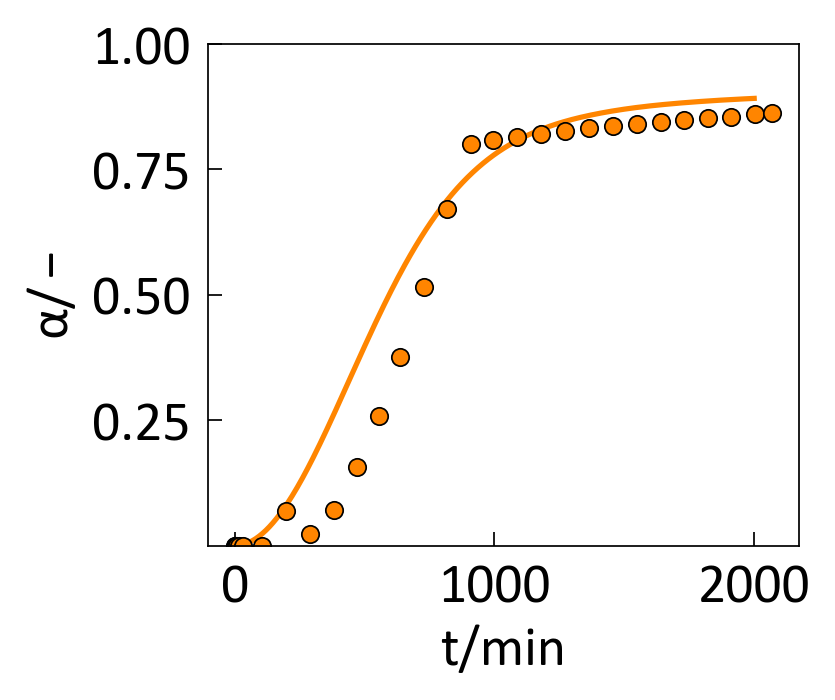

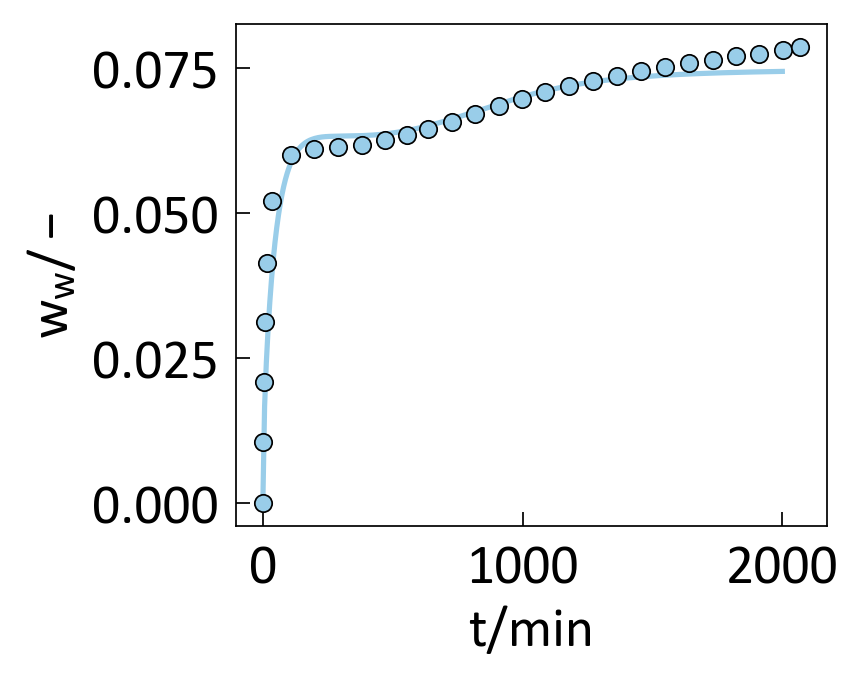

In [7]:
nt=300
t=np.linspace(0,2000,nt)*60
# witB,alphaB,r=cryst_iter(t,mobile,wi0,wi8,crystpar,lngi_fun,wv_fun)
tmin=t/60
Dvec=np.asarray([1E-13,1E-13,1E-13])
L=2.5E-5
# dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)
wt,wtz,zvec,Lt,alpha=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,saftpar=par,**crystpar,maxiter=None)
alphaB=np.average(alpha,axis=0)
fig,ax=plt.subplots()
fig1,ax1=plt.subplots()
ax.plot(t/60,alphaB,'C3-')
ax.plot(texp,alphaexp,'C3o')
ax.set_yticks([0.25,0.5,0.75,1])
ax.set_ylim([0,1])
ax.set_xlabel('t/min')
ax.set_ylabel(r'$\alpha/-$')

XwL=wt[:,0]/(1-wt[:,0])
Xw=XwL*(1-alphaB*dl0)
ww=Xw/(1+Xw)
ax1.plot(t/60,ww,'C1-')
ax1.plot(texp,wwexp,'C1o')
ax1.set_xlabel('t/min')
ax1.set_ylabel('$w_w/-$')
# pd.DataFrame((tmin,ww)).T.to_clipboard(excel=True, sep=None, index=False, header=None)

